Maulana Zulfikar Aziz - Customer Segmentation

# PENGENALAN DATA

In [1]:
import pandas as pd
data = pd.read_csv("Dataset/dqlab_customer_segments.csv")
data.head()

,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun
0,CUST-001,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927
1,CUST-002,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700
2,CUST-003,Agus Cahyono,Pria,48,Professional,Cluster,5286429
3,CUST-004,Antonius Winarta,Pria,53,Professional,Cluster,5204498
4,CUST-005,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206


Penjelasan untuk masing-masing kolom :
- Customer ID: Kode pelanggan dengan format campuran teks CUST- diikuti angka
- Nama Pelanggan: Nama dari pelanggan dengan format teks tentunya
- Jenis Kelamin: Jenis kelamin dari pelanggan, hanya terdapat dua isi data kategori yaitu Pria dan Wanita
- Umur: Umur dari pelanggan dalam format angka
- Profesi: Profesi dari pelanggan, juga bertipe teks kategori yang terdiri dari Wiraswasta, Pelajar, Professional, Ibu Rumah Tangga, dan Mahasiswa.
- Tipe Residen: Tipe tempat tinggal dari pelanggan kita, untuk dataset ini hanya ada dua kategori: Cluster dan Sector.
- Nilai Belanja Setahun: Merupakan total belanja yang sudah dikeluarkan oleh pelanggan tersebut.


## Melihat informasi dari data

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_ID          50 non-null     object
 1   Nama Pelanggan       50 non-null     object
 2   Jenis Kelamin        50 non-null     object
 3   Umur                 50 non-null     int64 
 4   Profesi              50 non-null     object
 5   Tipe Residen         50 non-null     object
 6   NilaiBelanjaSetahun  50 non-null     int64 
dtypes: int64(2), object(5)
memory usage: 2.9+ KB


Dari informasi tersebut kita bisa melihat bahwa data kita :
- Memiliki 50 baris dan 7 kolom
- Tidak memiliki nilai NULL
- Terdapat 5 kolom yang berupa non-numerik dan 2 kolom yang berupa numerik

# EKSPLORASI DATA

## Eskplorasi data numerik

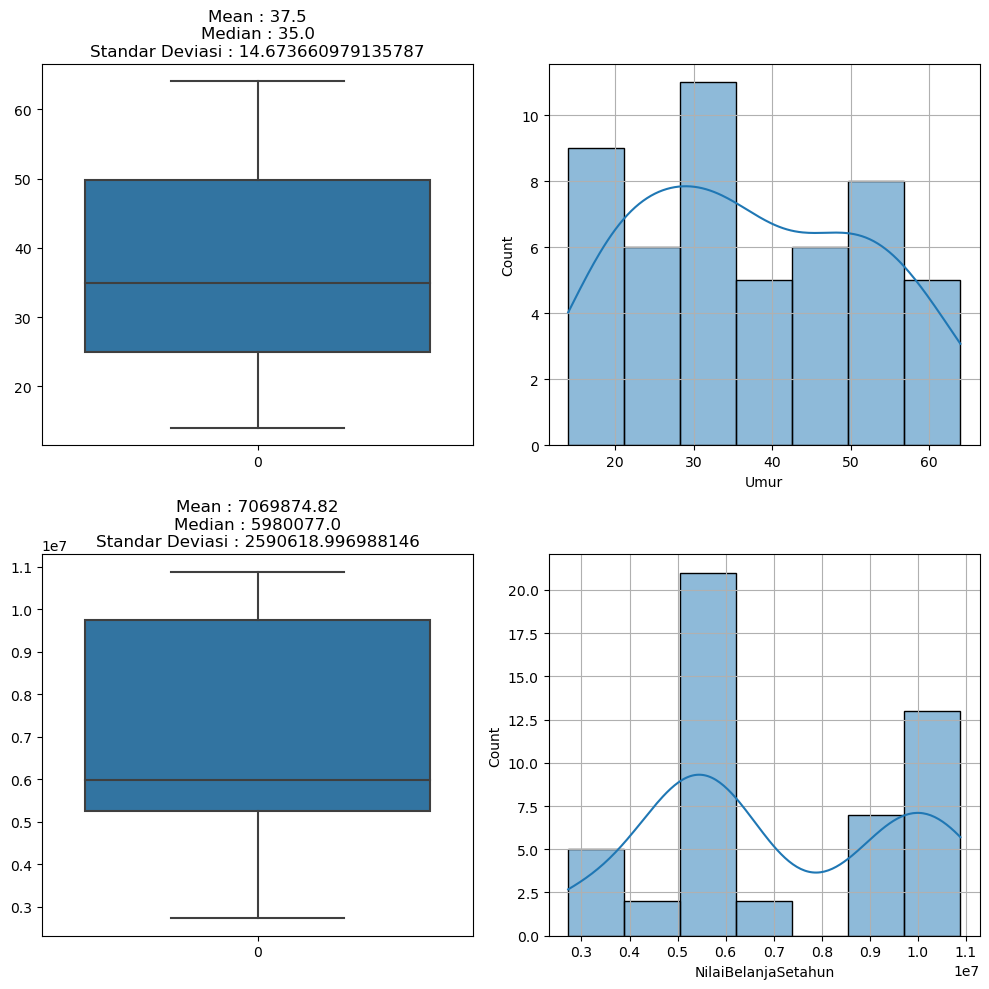

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Buat sebuah fungsi untuk menampilkan visualisasi
def numerical_observe(features) :
    fig, ax = plt.subplots(2,2,figsize=(10,10))
    for i, col in enumerate(features) :
        sns.boxplot(data[col],ax=ax[i][0])
        sns.histplot(data[col],ax=ax[i][1],kde=True)
        ax[i][0].set_title("Mean : {}\nMedian : {}\nStandar Deviasi : {}".format(data[col].mean(),
                                                                                data[col].median(),
                                                                               data[col].std()))
        ax[i][1].grid()
    plt.tight_layout()
    plt.show()

# Tampilkan hasil eksplorasi data numerik
features = ['Umur','NilaiBelanjaSetahun']
numerical_observe(features)

## Eksplorasi data kategorik

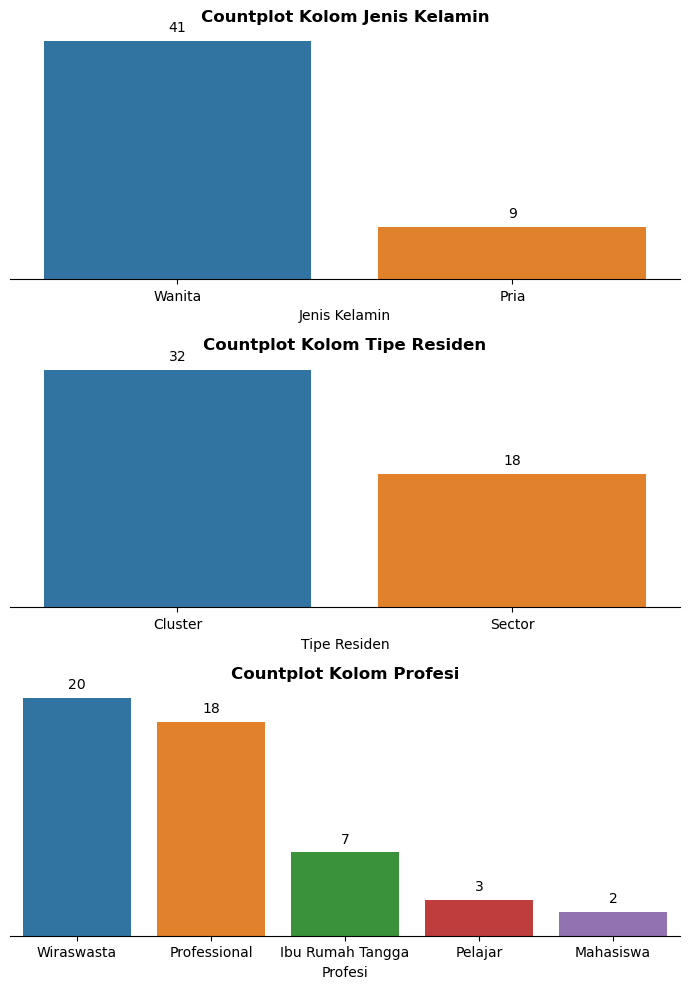

In [4]:
# Buat sebuah fungsi untuk menampilkan visualisasi
def observe_categorical(features) :
    fig, ax = plt.subplots(3,1,figsize=(7,10))
    for i, col in enumerate(features) :
        sns.countplot(data=data,x=col,order = data[col].value_counts().index, ax=ax[i])
        for x in ax[i].patches :
            ax[i].annotate((format(x.get_height(),".0f")),
                           (x.get_x()+x.get_width()/2,x.get_height()),
                          ha='center',
                          va='center',
                          xytext=(0,10),
                          textcoords="offset points")
        ax[i].set_title("Countplot Kolom {}".format(col),weight="bold")
        sns.despine(top=True,left=True,right=True)
        ax[i].axes.yaxis.set_visible(False)
        plt.tight_layout()
    plt.show()
    
# Tampilkan hasil eksplorasi data kategorik
features = ["Jenis Kelamin","Tipe Residen", "Profesi"]
observe_categorical(features)

## Kesimpulan 

- Tidak terdapat outlier pada data numerik
- Rata-rata nilai belanja setahun pada pelanggan adalah Rp7.069.874 dengan jumlah terbanyak terletak pada rentang sekitar Rp5.000.000 - Rp6.200.000
- Rata-rata umur pelanggan adalah 37.5 tahun dengan jumlah terbanyak terletak pada rentang sekitar 28 - 36 tahun
- Untuk jenis kelamin pelanggan didominasi oleh wanita dengan perbandingan 41 wanita (82%) : 9 pria (18%)
- Profesi kebanyakan pelanggan adalah Wiraswasta (40%) dan Professional (36%), diikuti lainnya (24%)
- Dari seluruh pelanggan, 64% dari mereka tinggal di Cluster dan 36% lainnya tinggal di Sector

# Pemrosesan Data untuk Keperluan Modelling

## Standarisasi kolom numerik

In [5]:
from sklearn.preprocessing import StandardScaler

# Preview
numerical = ['Umur',"NilaiBelanjaSetahun"]
print("Data sebelum distandardisasi :")
print(data[numerical].head())
print("\nStatistik sebelum standardisasi :")
print(data[numerical].describe())

# Standardization menggunakan StandardScaler
scaler = StandardScaler()
data_stdz = scaler.fit_transform(data[numerical])
data_stdz = pd.DataFrame(data=data_stdz,columns=data[numerical].columns,index=data.index)
print("\nData setelah distandardisasi :")
print(data_stdz.head())
print("\nStatistik setelah standardisasi :")
print(data_stdz.describe().round(5))

Data sebelum distandardisasi :
   Umur  NilaiBelanjaSetahun
0    58              9497927
1    14              2722700
2    48              5286429
3    53              5204498
4    41             10615206

Statistik sebelum standardisasi :
            Umur  NilaiBelanjaSetahun
count  50.000000         5.000000e+01
mean   37.500000         7.069875e+06
std    14.673661         2.590619e+06
min    14.000000         2.722700e+06
25%    25.000000         5.257530e+06
50%    35.000000         5.980077e+06
75%    49.750000         9.739615e+06
max    64.000000         1.088451e+07

Data setelah distandardisasi :
       Umur  NilaiBelanjaSetahun
0  1.411245             0.946763
1 -1.617768            -1.695081
2  0.722833            -0.695414
3  1.067039            -0.727361
4  0.240944             1.382421

Statistik setelah standardisasi :
           Umur  NilaiBelanjaSetahun
count  50.00000             50.00000
mean   -0.00000             -0.00000
std     1.01015              1.01015
min  

## Encoding kolom kategorikal

In [6]:
from sklearn.preprocessing import LabelEncoder
# Preview
categorical = ['Jenis Kelamin','Profesi','Tipe Residen']
print("Data kategorikal sebelum proses encoding :")
print(data[categorical].head())

# Proses Encoding
LE = LabelEncoder()
data_encode = data[categorical].copy()
for col in categorical :
    data_encode[col] = LE.fit_transform(data_encode[col])
    unique_before = data[col].unique()
    unique_after = data_encode[col].unique()
    print("\nRepresentasi nilai pada kolom",col)
    for i in range(len(unique_before)) :
        print("{} : {}".format(unique_before[i],unique_after[i]))

print("\nData kategorikal setelah proses encoding :")
print(data_encode.head())

Data kategorikal sebelum proses encoding :
  Jenis Kelamin       Profesi Tipe Residen
0          Pria    Wiraswasta       Sector
1        Wanita       Pelajar      Cluster
2          Pria  Professional      Cluster
3          Pria  Professional      Cluster
4        Wanita    Wiraswasta      Cluster

Representasi nilai pada kolom Jenis Kelamin
Pria : 0
Wanita : 1

Representasi nilai pada kolom Profesi
Wiraswasta : 4
Pelajar : 2
Professional : 3
Ibu Rumah Tangga : 0
Mahasiswa : 1

Representasi nilai pada kolom Tipe Residen
Sector : 1
Cluster : 0

Data kategorikal setelah proses encoding :
   Jenis Kelamin  Profesi  Tipe Residen
0              0        4             1
1              1        2             0
2              0        3             0
3              0        3             0
4              1        4             0


## Menggabungkan kolom numerik dan kategorik yang telah diproses

In [7]:
df_model = data_encode.merge(data_stdz,left_index=True,right_index=True)
print('Hasil penggabungan feature yang telah diproses :')
df_model.head()

Hasil penggabungan feature yang telah diproses :


,Jenis Kelamin,Profesi,Tipe Residen,Umur,NilaiBelanjaSetahun
0,0,4,1,1.411245,0.946763
1,1,2,0,-1.617768,-1.695081
2,0,3,0,0.722833,-0.695414
3,0,3,0,1.067039,-0.727361
4,1,4,0,0.240944,1.382421


Sekarang, data yang dimiliki sudah siap untuk modelling

# PEMODELAN

## Mencari jumlah klaster yang optimal dengan metode Elbow Plot

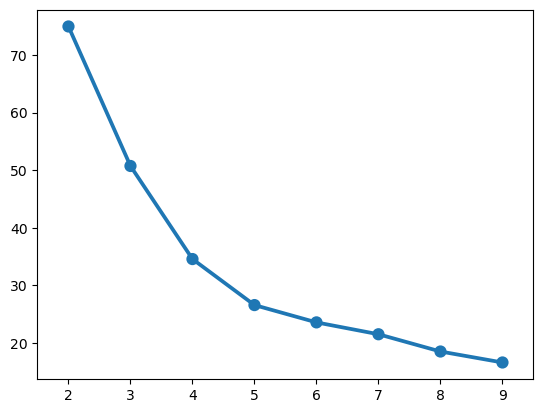

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from kmodes.kprototypes import KPrototypes

cost = {}

# Melakukan iterasi untuk mendapatkan Cost dari masing-masing model yang jumlah klasternya berbeda-beda
for k in range(2,10) :
    model = KPrototypes(n_clusters=k,random_state=1)
    model.fit_predict(df_model,categorical=[0,1,2])
    cost[k] = model.cost_

sns.pointplot(x=list(cost.keys()),y=list(cost.values()))
plt.show()

Dapat dilihat pada grafik bahwa elbow terbentuk saat k = 5.
Sehingga diperoleh bahwa jumlah kluster yang optimal untuk data kita adalah k = 5.

## Membuat dan menyimpan model

In [9]:
import pickle
model = KPrototypes(n_clusters=5,random_state=1)
model.fit_predict(df_model,categorical=[0,1,2])
pickle.dump(model,open('cluster.pkl','wb'))

## Menggunakan model untuk menentukan kluster pada data

In [10]:
model = KPrototypes(n_clusters=5,random_state=1)
model.fit(df_model,categorical=[0,1,2])
clusters = model.predict(df_model,categorical=[0,1,2])
df_final = data.copy()
df_final["cluster"] = clusters
print("Cluster : {}".format(clusters))
df_final.head()

Cluster : [3 2 1 1 0 4 3 1 4 4 1 1 3 3 0 4 4 1 0 2 0 1 4 0 0 1 0 4 1 1 2 3 2 0 4 0 4
 3 4 2 4 0 4 0 4 0 1 3 4 3]


,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun,cluster
0,CUST-001,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927,3
1,CUST-002,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700,2
2,CUST-003,Agus Cahyono,Pria,48,Professional,Cluster,5286429,1
3,CUST-004,Antonius Winarta,Pria,53,Professional,Cluster,5204498,1
4,CUST-005,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206,0


## Menampilkan cluster tiap pelanggan

In [11]:
for i in range(0,5) :
    print("\nPelanggan cluster {}".format(i))
    print(df_final[df_final["cluster"]==i])


Pelanggan cluster 0
   Customer_ID       Nama Pelanggan Jenis Kelamin  Umur     Profesi  \
4     CUST-005  Ibu Sri Wahyuni, IR        Wanita    41  Wiraswasta   
14    CUST-015     Shirley Ratuwati        Wanita    20  Wiraswasta   
18    CUST-019         Mega Pranoto        Wanita    32  Wiraswasta   
20    CUST-021     Lestari Fabianto        Wanita    38  Wiraswasta   
23    CUST-024        Putri Ginting        Wanita    39  Wiraswasta   
24    CUST-025       Julia Setiawan        Wanita    29  Wiraswasta   
26    CUST-027        Grace Mulyati        Wanita    35  Wiraswasta   
33    CUST-034       Deasy Arisandi        Wanita    21  Wiraswasta   
35    CUST-036       Ni Made Suasti        Wanita    30  Wiraswasta   
41    CUST-042         Yuliana Wati        Wanita    26  Wiraswasta   
43    CUST-044                 Anna        Wanita    18  Wiraswasta   
45    CUST-046         Elfira Surya        Wanita    25  Wiraswasta   

   Tipe Residen  NilaiBelanjaSetahun  cluster  
4      

Beberapa informasi yang bisa kita dapatkan:
- Cluster 0 diisi oleh pelanggan yang berprofesi sebagai Wiraswasta dengan rentang umur 18-41 tahun
- Cluster 1 diisi oleh pelanggan yang berprofesi sebagai Ibu Rumah Tangga & Professional dengan rentang umur 46-63 tahun
- Cluster 2 diisi oleh pelanggan yang berprofesi sebagai Pelajar & Mahasiswa dengan rentang umur 14-19 tahun
- Cluster 3 diisi oleh pelanggan yang berprofesi sebagai Wiraswasta dengan rentang umur 45-64 tahun
- Cluster 4 diisi oleh pelanggan yang berprofesi sebagai Ibu Rumah Tangga & Professional dengan rentang umur 20-40 tahun

## Visualisasi hasil cluster untuk kolom numerik menggunakan boxplot

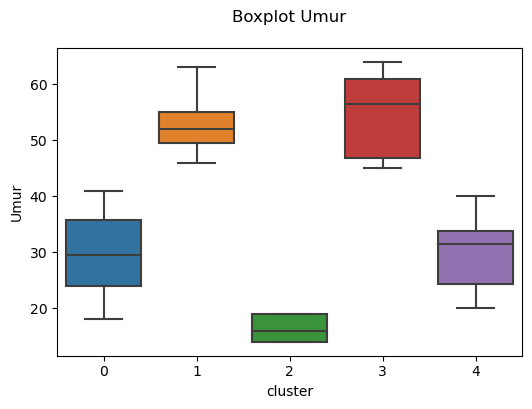

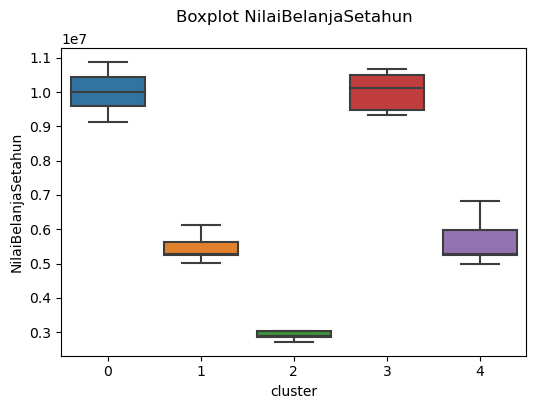

In [12]:
kolom_numerik = ["Umur","NilaiBelanjaSetahun"]
for i in kolom_numerik :
    plt.figure(figsize=(6,4))
    sns.boxplot(x="cluster",y=i,data=df_final)
    plt.title("Boxplot {}\n".format(i))
    plt.show()

## Visualisasi hasil cluster untuk kolom kategorik menggunakan countplot

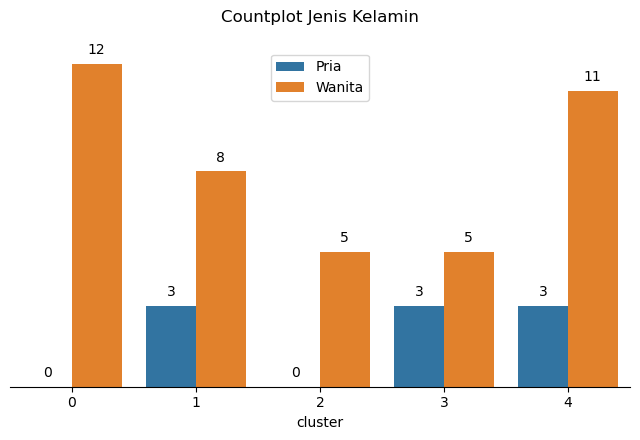

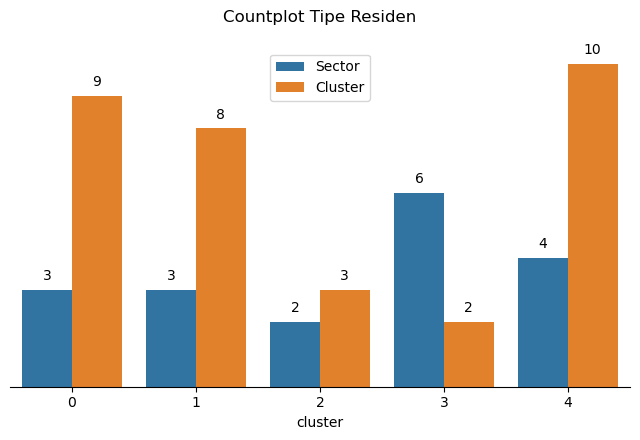

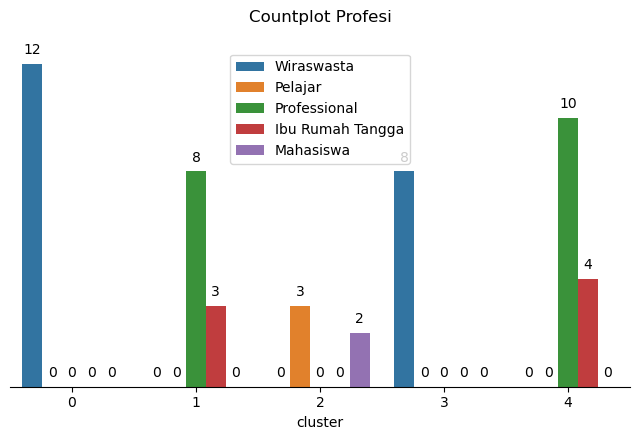

In [13]:
kolom_kategorik = ["Jenis Kelamin","Tipe Residen","Profesi"]
for i in kolom_kategorik :
    plt.figure(figsize=(6.5,4.5))
    ax = sns.countplot(data=df_final,x="cluster",hue=i)
    plt.title("Countplot {}\n".format(i))
    ax.legend(loc="upper center")
    for p in ax.patches :
        ax.annotate(format(p.get_height(),".0f"),
                   (p.get_x()+p.get_width()/2,p.get_height()),
                   ha='center',
                   va='center',
                   xytext=(0,10),
                   textcoords='offset points')
    sns.despine(right=True,left=True,top=True)
    ax.axes.yaxis.set_visible(False)
    plt.tight_layout()
plt.show()

## Penamaan cluster

Dari observasi yang telah dilakukan, selanjutnya akan dilakukan penamaan segmen sebagai berikut :
- Cluster 0 : Diamond Young Member, isi cluster ini adalah para Wiraswasta muda dengan rentang umur 18-41 tahun yang memiliki nilai transaksi rata-rata mendekati 10 juta.
- Cluster 1 : Gold Senior Member, isi cluster ini adalah para Profesional & Ibu Rumah Tangga dengan rentang umur 46-63 tahun yang memiliki nilai transaksi rata-rata mendekati 6 juta.
- Cluster 2 : Silver Students, isi cluster ini adalah para Pelajar & Mahasiswa dengan rentang umur 14-19 tahun yang memiliki nilai transaksi rata-rata mendekati 3 juta.
- Cluster 3 : Diamond Senior Member, isi cluster ini adalah para Wiraswasta senior dengan rentang umur 45-64 tahun yang memiliki nilai transaksi rata-rata mendekati 10 juta.
- Cluster 4 : Gold Young Member, isi cluster ini adalah para Profesional & Ibu Rumah Tangga dengan rentang umur 20-40 tahun yang memiliki nilai transaksi rata-rata mendekati 6 juta.

In [14]:
df_final['segmen'] = df_final['cluster'].map({
    0 : "Diamond Young Member",
    1 : "Gold Senior Member",
    2 : "Silver Students",
    3 : "Diamond Senior Member",
    4 : "Gold Young Member"
})
df_final.head(10)

,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun,cluster,segmen
0,CUST-001,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927,3,Diamond Senior Member
1,CUST-002,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700,2,Silver Students
2,CUST-003,Agus Cahyono,Pria,48,Professional,Cluster,5286429,1,Gold Senior Member
3,CUST-004,Antonius Winarta,Pria,53,Professional,Cluster,5204498,1,Gold Senior Member
4,CUST-005,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206,0,Diamond Young Member
5,CUST-006,Rosalina Kurnia,Wanita,24,Professional,Cluster,5215541,4,Gold Young Member
6,CUST-007,"Cahyono, Agus",Pria,64,Wiraswasta,Sector,9837260,3,Diamond Senior Member
7,CUST-008,Danang Santosa,Pria,52,Professional,Cluster,5223569,1,Gold Senior Member
8,CUST-009,Elisabeth Suryadinata,Wanita,29,Professional,Sector,5993218,4,Gold Young Member
9,CUST-010,Mario Setiawan,Pria,33,Professional,Cluster,5257448,4,Gold Young Member


# Uji Model pada Data Baru

## Membuat data baru untuk menguji model

In [15]:
new_data = [{  
    'Customer_ID': 'CUST-100' ,  
    'Nama Pelanggan': 'Joko' ,  
    'Jenis Kelamin': 'Pria',  
    'Umur': 45,  
    'Profesi': 'Wiraswasta',  
    'Tipe Residen': 'Cluster' ,  
    'NilaiBelanjaSetahun': 8230000  
      
}]  
new_data = pd.DataFrame(new_data)
new_data

,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun
0,CUST-100,Joko,Pria,45,Wiraswasta,Cluster,8230000


## Membuat fungsi untuk melakukan data preprocessing pada data yang baru

In [16]:
def preprocessing(df) :
    # Proses standardisasi pada kolom numerik
    kolom_numerik = ["Umur","NilaiBelanjaSetahun"]
    df_stnd = df[kolom_numerik].copy()
    for n in kolom_numerik :
        df_stnd[n] = (df_stnd[n]-data[n].mean())/data[n].std()
    
    # Proses encoding pada kolom kategorikal
    kolom_kategorikal = ["Jenis Kelamin","Profesi","Tipe Residen"]
    df_encode = df[kolom_kategorikal].copy()
    df_encode["Jenis Kelamin"] = df_encode["Jenis Kelamin"].map({
        "Pria" : 0,
        "Wanita" : 0
    })
    df_encode["Profesi"] = df_encode['Profesi'].map({
        "Ibu Rumah Tangga" : 0,
        "Mahasiswa" : 1,
        "Pelajar" : 2,
        "Professional" : 3,
        "Wiraswasta" : 4
    })
    df_encode["Tipe Residen"] = df_encode["Tipe Residen"].map({
        "Cluster" : 0,
        "Sector" : 1
    })
    
    data_ready = df_encode.merge(df_stnd,right_index=True,left_index=True,how="left")
    return data_ready

newest_data = preprocessing(new_data)
newest_data

,Jenis Kelamin,Profesi,Tipe Residen,Umur,NilaiBelanjaSetahun
0,0,4,0,0.51112,0.447818


## Memanggil model dan melakukan prediksi

In [17]:
import pickle

def modelling(df) :
    
    # Memanggil model
    model = pickle.load(open('cluster.pkl','rb'))
    
    # Melakukan prediksi
    cluster = model.predict(df,categorical=[0,1,2])
    
    return cluster

cluster_dari_newestdata = modelling(newest_data)
print(cluster_dari_newestdata)

[3]


## Membuat fungsi untuk finalisasi

In [18]:
def finalisasi(df,cluster) :
    df_final = df.copy()
    df_final['cluster'] = cluster
    df_final['segmen'] = df_final['cluster'].map({
        0 : "Diamond Young Member",
        1 : "Gold Senior Member",
        2 : "Silver Students",
        3 : "Diamond Senior Member",
        4 : "Gold Young Member"
    })
    return df_final

final_new_data = finalisasi(newest_data,cluster_dari_newestdata)
final_new_data

,Jenis Kelamin,Profesi,Tipe Residen,Umur,NilaiBelanjaSetahun,cluster,segmen
0,0,4,0,0.51112,0.447818,3,Diamond Senior Member
